# Predicting the Quality of Wine
### Chenxue Hou
### Sept 30th, 2024

## 1 Loading and Exploring the Data Set

Let us first read the data set from the file. Remember to make sure that you are working in the directory containing the data file. 

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

wine = pd.read_csv('Wine.csv')  
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25 non-null     int64  
 1   Price        25 non-null     float64
 2   WinterRain   25 non-null     int64  
 3   AGST         25 non-null     float64
 4   HarvestRain  25 non-null     int64  
 5   Age          25 non-null     int64  
 6   FrancePop    25 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 1.5 KB


We can look at the summary of our data.

In [2]:
wine.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


We can explore the relationship between any two variables. For example, let us see how the wine price changes with the temperature, represented by `AGST`, which stands for the average growing season temperature. We can add a horizontal line that represents the historical average price.

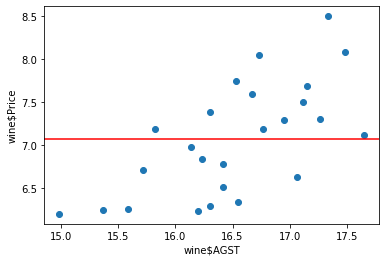

In [3]:
import matplotlib.pyplot as plt  
%matplotlib inline

plt.xlabel('wine$AGST')
plt.ylabel('wine$Price')
plt.scatter(wine['AGST'],wine['Price'])
plt.axhline(y=wine['Price'].mean(), color='r', linestyle='-')
plt.show()

## 2 Building Linear Regression Models

Let us start by creating a one-variable linear regression equation using `AGST` to predict Price. Here we use the `lm` function, which stands for 'inear model'.

In [4]:
import numpy as np

X = np.array(wine['AGST'])[:, np.newaxis]  #convert wine['AGST'] to a matrix (one column)
y = wine['Price']

In [5]:
from sklearn import linear_model  

model1 = linear_model.LinearRegression()
model1.fit(X,y)
print('intercept:', model1.intercept_)  
print('slope:', model1.coef_)  

r_sq = model1.score(X, y)
print('coefficient of determination(𝑅²) :', r_sq)

intercept: -3.4177613134854585
slope: [0.63509431]
coefficient of determination(𝑅²) : 0.4350231677999199


We can plot the regression line of our model, together with the benchmark prediction using the historical average price.

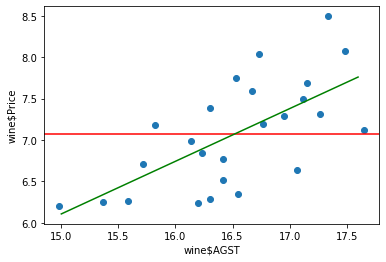

In [6]:
plt.xlabel('wine$AGST')
plt.ylabel('wine$Price')
plt.scatter(wine['AGST'],wine['Price'])
plt.axhline(y=wine['Price'].mean(), color='r', linestyle='-')

xfit = np.linspace(15, 17.6, 1000)[:, np.newaxis] 
#generate an array including 1000 numbers from 15 to 17.6 and convert it to a matrix 
yfit = model1.predict(xfit) 
plt.plot(xfit, yfit,color='g')
plt.show()

We can compute the sum of squared errors.

In [7]:
y_predicted1=model1.predict(X)
SSE1 = np.sum((y-y_predicted1)**2)
SSE1

5.734875147020114

Now, let us add another variable, `HarvestRain`, to our regression model.

In [8]:
X2 = wine.loc[:,['AGST','HarvestRain']]
model2 = linear_model.LinearRegression()
model2.fit(X2,y)

print('intercept:', model2.intercept_) 
print('slope:', model2.coef_)  

r_sq = model2.score(X2, y)
print('coefficient of determination(𝑅²) :', r_sq)

intercept: -2.202653600949949
slope: [ 0.60261691 -0.00457006]
coefficient of determination(𝑅²) : 0.7073707662049415


Again, we can compute the sum of squared errors of this new model.

In [9]:
y_predicted2=model2.predict(X2)
SSE2 = np.sum((y-y_predicted2)**2)
SSE2

2.970373340173543

Let us build a third model with all of our independent variables and compute its sum of squared errors.

In [10]:
X3 = wine.drop(['Price','Year'], axis=1)
model3 = linear_model.LinearRegression()
model3.fit(X3,y)

print('intercept:', model3.intercept_)  
print('slope:', model3.coef_)  

r_sq = model3.score(X3, y)
print('coefficient of determination(𝑅²) :', r_sq)

intercept: -0.4503988643946162
slope: [ 1.04250681e-03  6.01223884e-01 -3.95812450e-03  5.84748489e-04
 -4.95273038e-05]
coefficient of determination(𝑅²) : 0.8293592223299041


In [11]:
y_predicted3=model3.predict(X3)
SSE3 = np.sum((y-y_predicted3)**2)
SSE3

1.7321127153437976

## 3 Refining the Model
Multicollearity problem: In particular, we suspect Age and FrancePopulation are highly correlated. We can compute the correlation coefficients of all the variables by calling the ‘df.corr’ function

In [12]:
wine.corr()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


From the outputs, we can confirm that Age and FrancePopulation are highly correlated with an almost -1 correlation coefficient. The strong negative correlation between `Age` and `FrancePopulation` can be visualized in a scatter plot.

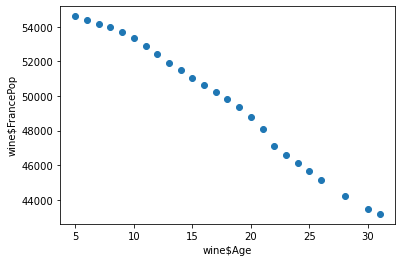

In [13]:
plt.xlabel('wine$Age')
plt.ylabel('wine$FrancePop')
plt.scatter(wine['Age'],wine['FrancePop'])
plt.show()

Because of this, we should consider removing one of them from our model. Let us start by just removing `FrancePopulation`, which we intuitively do not expect to be very predictive of wine price anyway.

In [14]:
X4 = wine.drop(['Price','Year','FrancePop',], axis=1)

model4 = linear_model.LinearRegression()
model4.fit(X4,y)

print('intercept:', model4.intercept_)  
print('slope:', model4.coef_)  

r_sq = model4.score(X4, y)
print('coefficient of determination(𝑅²) :', r_sq)

intercept: -3.4299801869287183
slope: [ 0.00107551  0.60720935 -0.00397153  0.02393083]
coefficient of determination(𝑅²) : 0.8285662193424281


In [15]:
y_predicted4=model4.predict(X4)
SSE4 = np.sum((y-y_predicted4)**2)
SSE4

1.7401622013849842

You can try removing Age, instead of FrancePopulation. You will get a model that is almost equivalent to the one using Age in terms of predictive power, i.e., they have very similar R squared. In this case, we would prefer to keep `Age` but remove `FrancePopulation` because `Age` is more interpretable, and the model using `Age` is more user friendly for managers and customers. Another important reason is that the relationship between FrancePopulation and Price could be spurious relationship. In other words, we have sufficient reasons to suspect that the relationship between `FrancePopulation` and `Price` is a consequence of the relationship between Age and Price and the relationship between `Age` and `FrancePopulation`. Suppose that we also collected some data on the population of any other country in the world, say Singapore, as long as it was increasing over the years, that population data will be significantly correlated with `Price` as it is correlated with `Age`, which does not make any sense to include that population variable in the model.

To further refining the model, we can consider removing some relatively insignificant variables. You are advised to remove insignificant variables one at a time. Let us see what would have happened if we had removed both `Age` and `FrancePopulation` at the same time.

In [16]:
X5 = wine.loc[:,['AGST','HarvestRain','WinterRain']]

model5= linear_model.LinearRegression()
model5.fit(X5,y)

print('intercept:', model5.intercept_)  
print('slope:', model5.coef_)  

r_sq = model5.score(X5, y)
print('coefficient of determination(𝑅²) :', r_sq)

intercept: -4.301626260041896
slope: [ 0.68102417 -0.00394815  0.00117653]
coefficient of determination(𝑅²) : 0.7536894426384035


We can see that R-squared drops significantly. In this case, we will keep `Age` together with the other three variables in the final model, instead of `FrancePopulation`, for the reasons discussed above.

## 4 Testing the Model
Now let us test our prediction model on the test data, which we will read in first.

In [17]:
wineTest=pd.read_csv('Wine_Test.csv')
wineTest

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1979,6.9541,717,16.1667,122,4,54835.832
1,1980,6.4979,578,16.0000,74,3,55110.236


We can call the `predict` function to make predictions for the test points.

In [18]:
predictTest =model4.predict(wineTest.drop(['Price','Year','FrancePop',], axis=1))
predictTest

array([6.76892463, 6.6849104 ])

To assess the accuracy of our predictions, we can compute the out-of-sample R-squared.

In [19]:
SSE = np.sum((wineTest['Price'] - predictTest)**2)
SST = np.sum((wineTest['Price'] - np.mean(wine['Price']))**2)
1 - SSE/SST   

0.7944277602633062